<a href="https://colab.research.google.com/github/Appaji-Yadla/Appaji-Yadla/blob/main/Medical_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Problem Statement -** The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset.

**Columns:**

**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of dependents

**smoker:** Smoking

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance


#Load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_ins = pd.read_csv("/content/drive/MyDrive/Data Science_Innomatics/Projects/insurance.csv")
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_ins.shape

(1338, 7)

#Exploratory Data Analysis (EDA)

In [ ]:
df_ins.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df_ins.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
df_ins.duplicated().sum()

1

In [ ]:
df_ins.drop_duplicates(inplace=True)

In [ ]:
df_ins.duplicated().sum()

0

In [ ]:
df_ins.shape

(1337, 7)

In [ ]:
df_ins.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [ ]:
df_ins['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [ ]:
df_ins['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [ ]:
df_ins.corr()

<ipython-input-16-b07b5b053479>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ins.corr()


,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


<ipython-input-17-8d987358f468>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ins.corr(), annot=True, linewidths =8, center =0,ax=ax, cmap="coolwarm")


<Axes: >

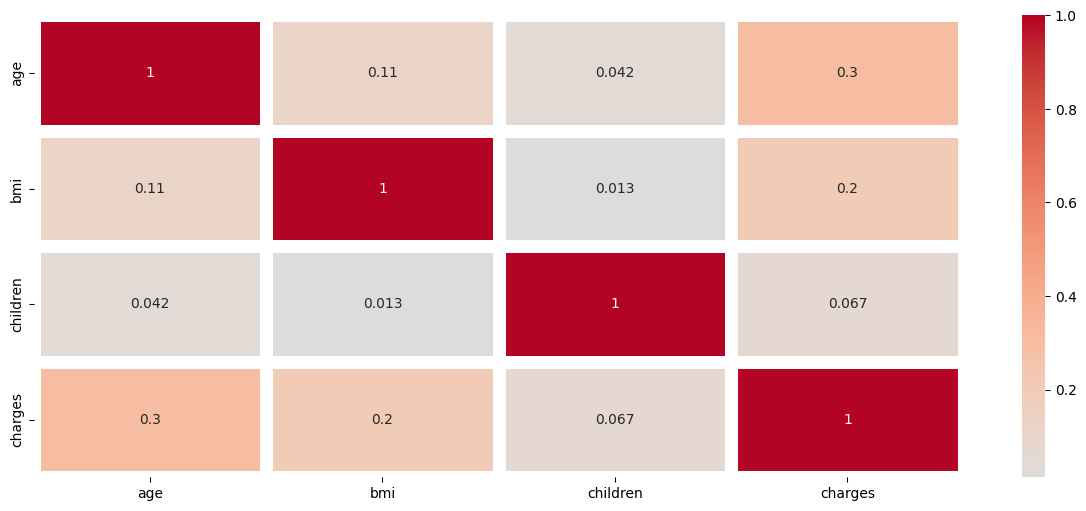

In [ ]:
f, ax = plt.subplots(figsize=(15,6))
sns.heatmap(df_ins.corr(), annot=True, linewidths =8, center =0,ax=ax, cmap="coolwarm")

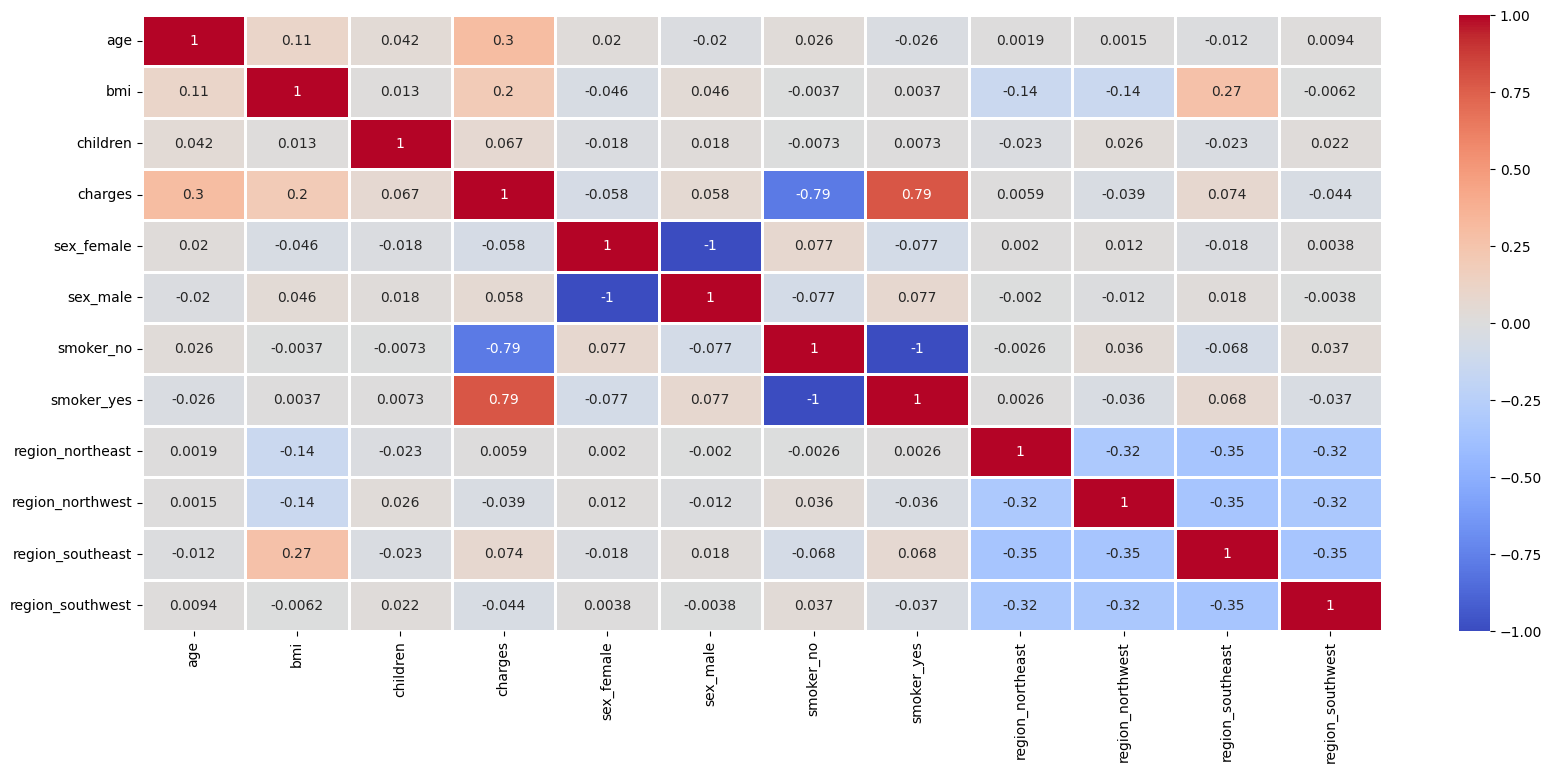

In [ ]:
# Convert categorical columns to numerical representations
df_encoded = pd.get_dummies(df_ins, columns=['sex', 'smoker', 'region'])

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, 8))  # Adjust the figure size as needed
sns.heatmap(df_encoded.corr(), annot=True, linewidths=0.8, center=0, cmap="coolwarm", ax=ax)
plt.show()

**Summary of Correlations**

1. **Age and Charges:**

Positive correlation (0.30) suggests that as age increases, medical charges also tend to increase.
2. **BMI and Charges:**

Positive correlation (0.20) indicates a mild relationship between BMI and medical charges.
3. **Smoking Status:**

Strong positive correlation (0.79) between being a smoker ('Yes') and higher medical charges.
Strong negative correlation (-0.79) between not being a smoker ('No') and medical charges.
4. **Variable Interactions:**

'Age' and 'BMI' have a slight positive correlation (0.11).
Inverse relationship (-1.00) between being a smoker ('Yes') and not being a smoker ('No').

In [ ]:
df_ins.region.value_counts().values

array([364, 325, 324, 324])

In [ ]:
df_ins.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

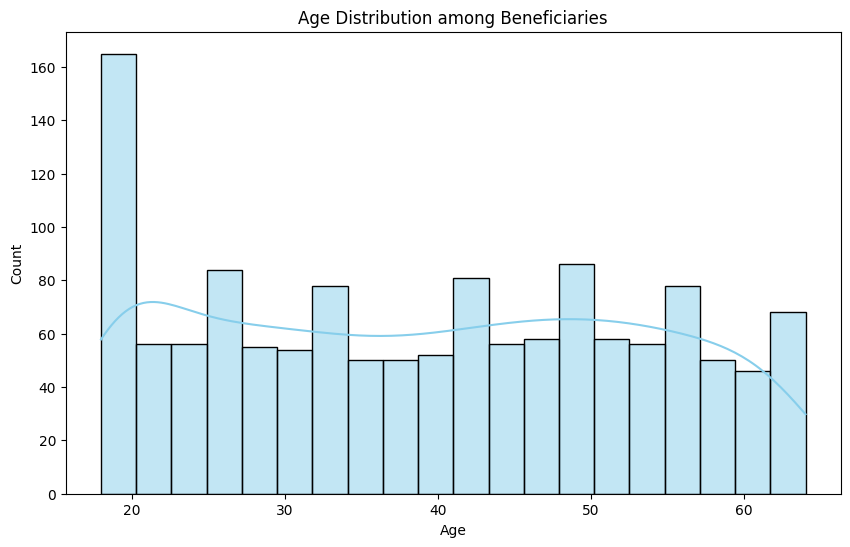

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ins['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution among Beneficiaries')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

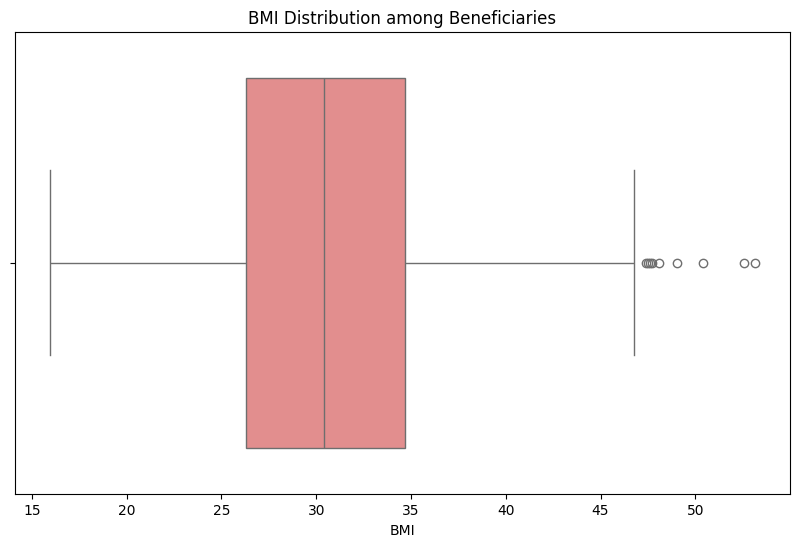

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_ins['bmi'], color='lightcoral')
plt.title('BMI Distribution among Beneficiaries')
plt.xlabel('BMI')
plt.show()

<ipython-input-23-937607ddcc0a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_ins['children'], palette='viridis')


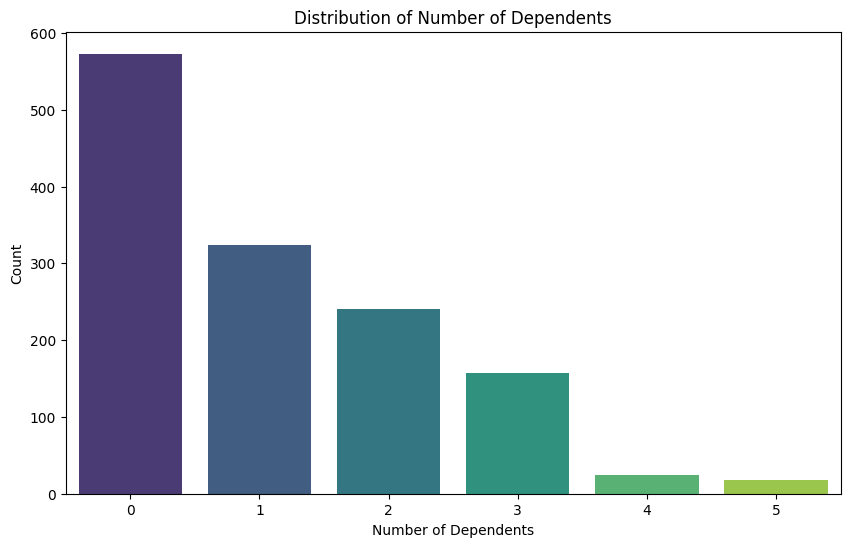

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df_ins['children'], palette='viridis')
plt.title('Distribution of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()


**Most Beneficiaries Have 0 or 1 Dependent:**

The majority of beneficiaries (580) have no dependents (0), indicating a significant proportion of individuals without additional family members covered by the insurance.

**Gradual Decrease in Frequency with More Dependents:**

As the number of dependents increases, the count decreases gradually. This is evident in the descending trend from 0 to 1, 1 to 2, and so on.

In [ ]:
df_ins['region'].value_counts().index

Index(['southeast', 'southwest', 'northwest', 'northeast'], dtype='object')

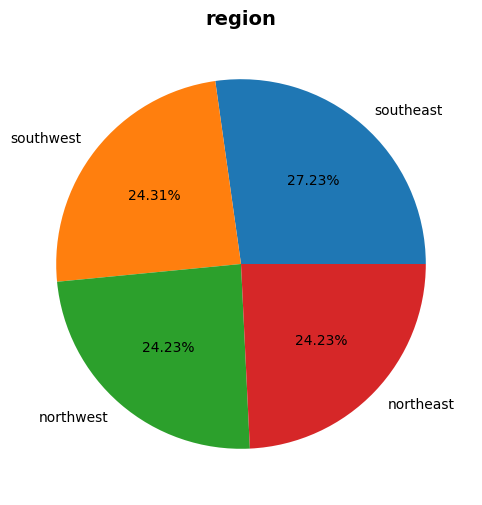

In [ ]:
plt.figure(figsize=(8,6))       # Create a figure and set its size
labels=df_ins['region'].value_counts().index      # Data for the pie chart
# Plot the pie chart with the specified settings
plt.pie(df_ins.region.value_counts().values, labels=labels, autopct='%.2f%%')
plt.title('region', fontsize=14, fontweight='bold')   # Add a title
plt.show()   # Display the pie chart

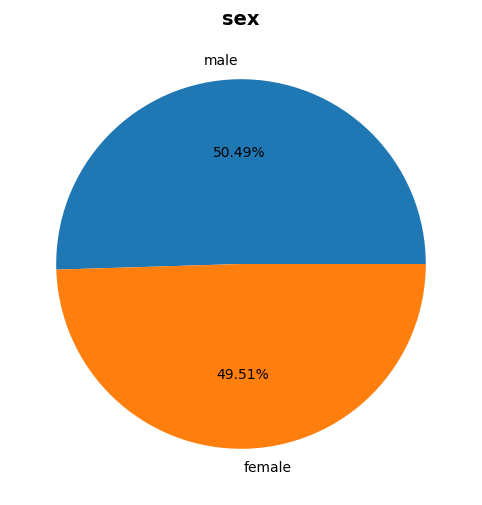

In [ ]:
plt.figure(figsize=(8,6))       # Create a figure and set its size
labels=df_ins['sex'].value_counts().index      # Data for the pie chart
# Plot the pie chart with the specified settings
plt.pie(df_ins.sex.value_counts().values, labels=labels, autopct='%.2f%%')
plt.title('sex', fontsize=14, fontweight='bold')   # Add a title
plt.show()   # Display the pie chart

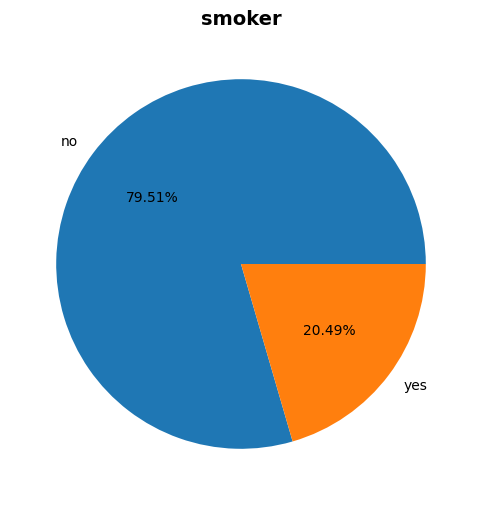

In [ ]:
plt.figure(figsize=(8,6))       # Create a figure and set its size
labels=df_ins['smoker'].value_counts().index      # Data for the pie chart
# Plot the pie chart with the specified settings
plt.pie(df_ins.smoker.value_counts().values, labels=labels, autopct='%.2f%%')
plt.title('smoker', fontsize=14, fontweight='bold')   # Add a title
plt.show()   # Display the pie chart

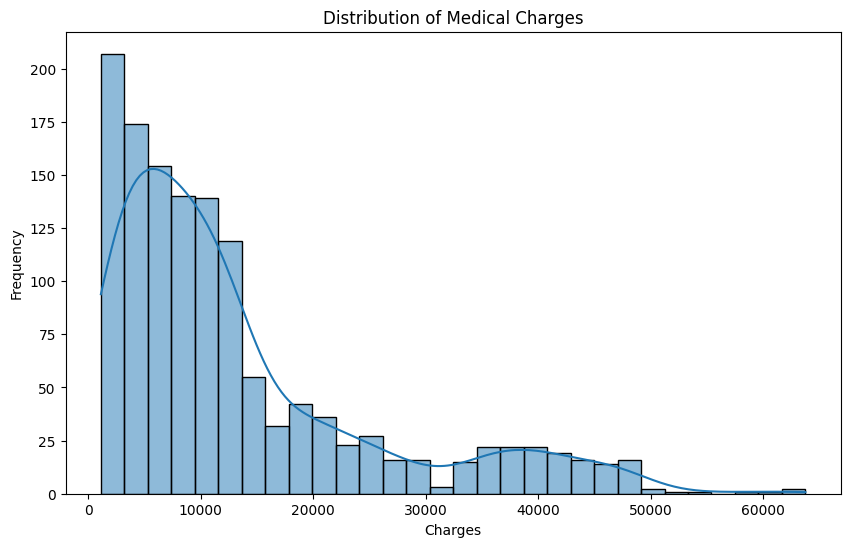

In [ ]:
# Distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(df_ins['charges'], bins=30, kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

**Key Observations:**

**>** The distribution of medical charges in the dataset is right-skewed, indicating a concentration of lower charges with a long tail of higher charges.

**>** Most individuals have relatively low medical costs, forming a peak on the left side of the distribution.

**>** The median charge appears to be somewhere around $10,000.

**>** There is a long tail of charges that extends to at least $60,000.

In [ ]:
df_ins.corr()

<ipython-input-29-b07b5b053479>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ins.corr()


,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


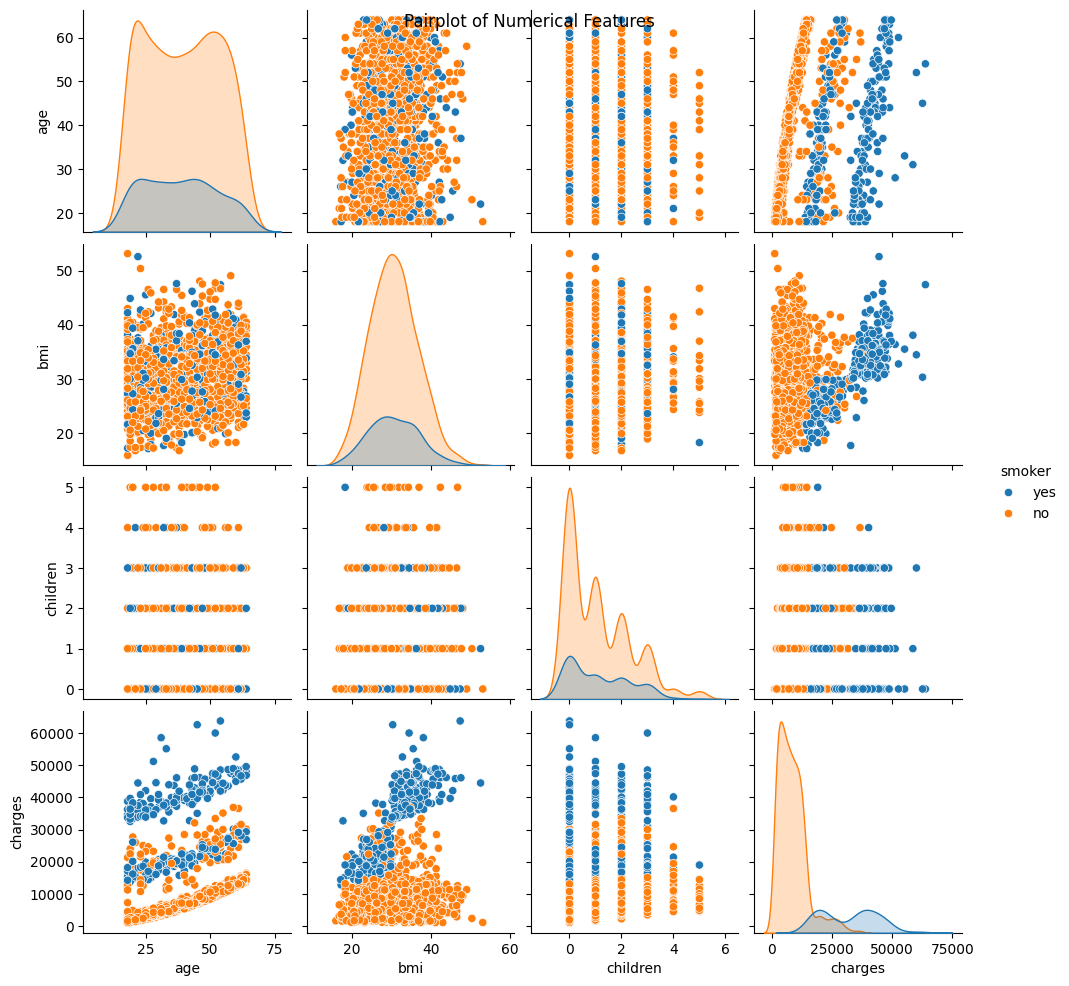

In [ ]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df_ins, hue='smoker')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

**Key Observations with target variable (charges):**

**Distribution of charges:** The distribution of charges is right-skewed, meaning that there are more people with lower charges than there are people with higher charges. The median charge is around 10,000, and there is a long tail of charges that extends to at least 60,000.

**Age:** There is a weak positive correlation between age and charges. This means that older people tend to have higher charges than younger people. For example, the plot shows that people in their 60s and 70s tend to have charges in the 40,000 to 60,000 range, while people in their 20s and 30s tend to have charges in the 0 to 20,000 range.

**BMI:** There is a weak positive correlation between BMI and charges. This means that people with higher BMIs tend to have higher charges than people with lower BMIs. For example, the plot shows that people with BMIs in the 40s and 50s tend to have charges in the 30,000 to 50,000 range, while people with BMIs in the 20s and 30s tend to have charges in the 0 to 20,000 range.

**Smoker:** Smokers tend to have higher charges than non-smokers. For example, the plot shows that smokers tend to have charges in the 30,000 to 60,000 range, while non-smokers tend to have charges in the 0 to 30,000 range.

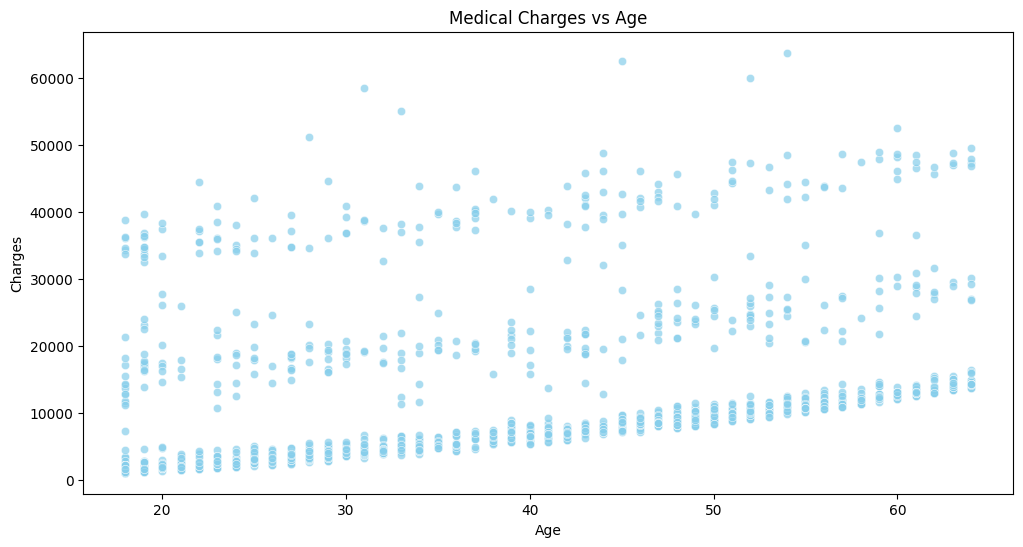

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='charges', data=df_ins, alpha=0.7, color='skyblue')
plt.title('Medical Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


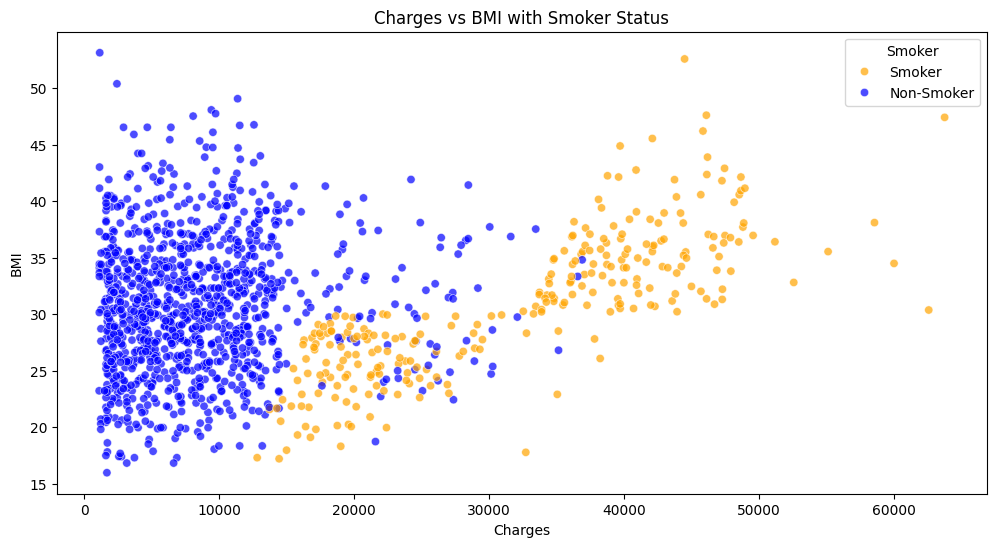

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot with different colors for smokers and non-smokers
scatter = sns.scatterplot(x='charges', y='bmi', hue='smoker', data=df_ins, palette={'yes': 'orange', 'no': 'blue'}, alpha=0.7)

# Get legend handles and labels
legend_handles, _ = scatter.get_legend_handles_labels()

# Adjust legend colors
legend_labels = ['Smoker', 'Non-Smoker']
plt.legend(legend_handles, legend_labels, title='Smoker', loc='upper right')

plt.title('Charges vs BMI with Smoker Status')
plt.xlabel('Charges')
plt.ylabel('BMI')
plt.show()


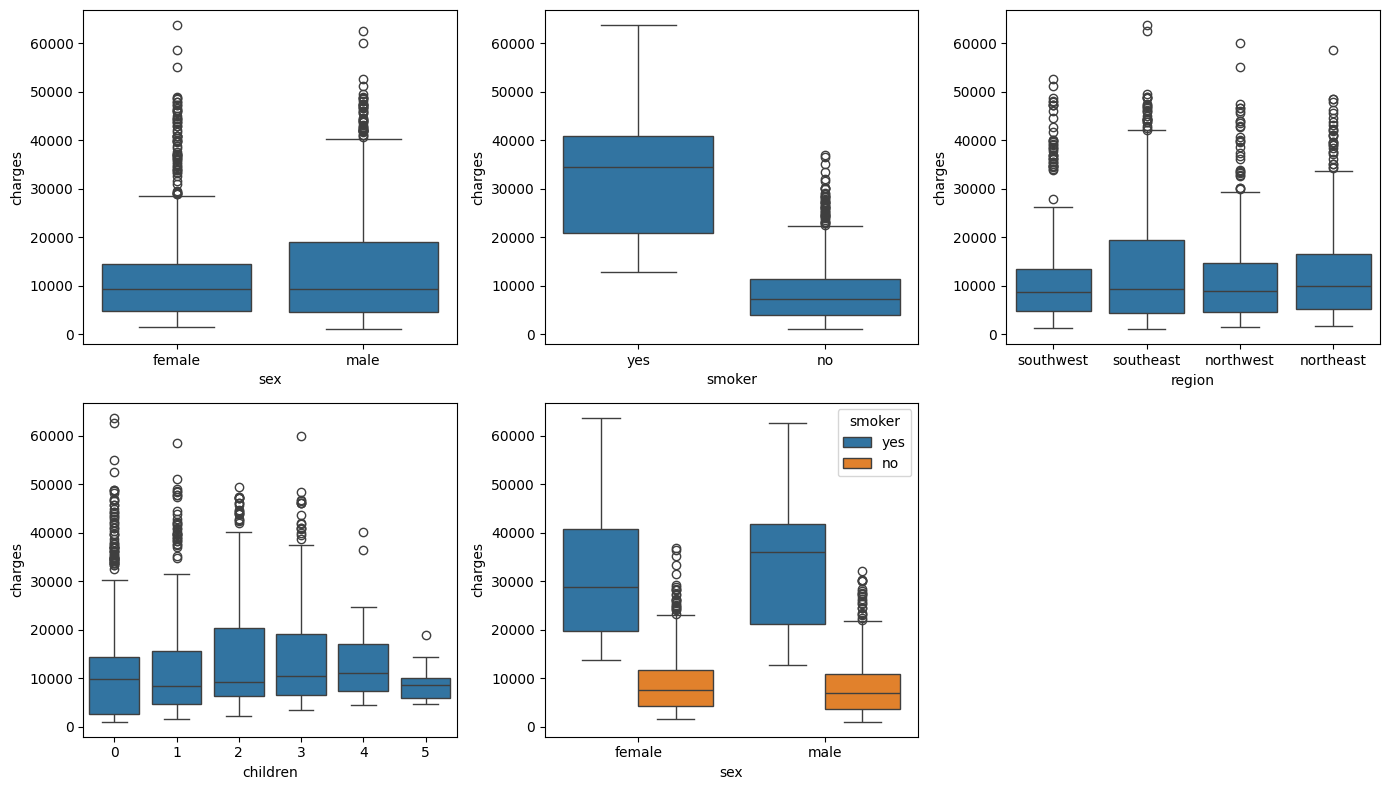

In [ ]:
# Boxplot for categorical variables
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.boxplot(x='sex', y='charges', data=df_ins)
plt.subplot(2, 3, 2)
sns.boxplot(x='smoker', y='charges', data=df_ins)
plt.subplot(2, 3, 3)
sns.boxplot(x='region', y='charges', data=df_ins)
plt.subplot(2, 3, 4)
sns.boxplot(x='children', y='charges', data=df_ins)
plt.subplot(2, 3, 5)
sns.boxplot(x='sex', y='charges', hue='smoker', data=df_ins)
plt.tight_layout()
plt.show()

**Key Observations:**



1. No significant difference in charges between males and females. The median charges are comparable.
2. Smokers tend to have significantly higher medical charges compared to non-smokers. For example, the plot shows that smokers tend to have charges in the approx 20,000 to 40,000 range, while non-smokers tend to have charges in the approx 4000 to 11,000 range.
3. There is variation in charges across different regions, but the differences are not as pronounced. Regions may have some influence on charges, but other factors may play a more substantial role.
4. The number of children does not exhibit a clear, consistent trend in relation to medical charges.

### Conclusion: Exploratory Data Analysis (EDA)

The Exploratory Data Analysis (EDA) highlights a right-skewed distribution of medical charges, with a majority incurring lower costs. Smokers exhibit significantly higher charges, while age and BMI show weak positive correlations. Gender, region, and the number of children have minimal impact on charges.

#Data Preprocessing

In [ ]:
# Skewness of output variable
df_ins["charges"].skew()

1.5153909108403483

<Axes: xlabel='charges', ylabel='Density'>

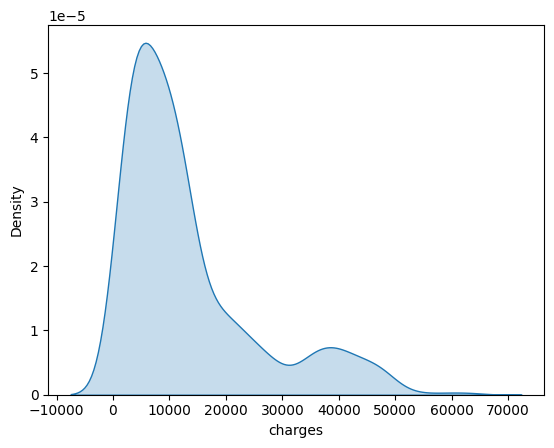

In [ ]:
sns.kdeplot(data=df_ins["charges"], fill=True)

In [ ]:
# Log transforming the output
df_ins["charges_log"] = pd.DataFrame({"charges": np.log(df_ins["charges"])})
df_ins.head()

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


<Axes: xlabel='charges_log', ylabel='Density'>

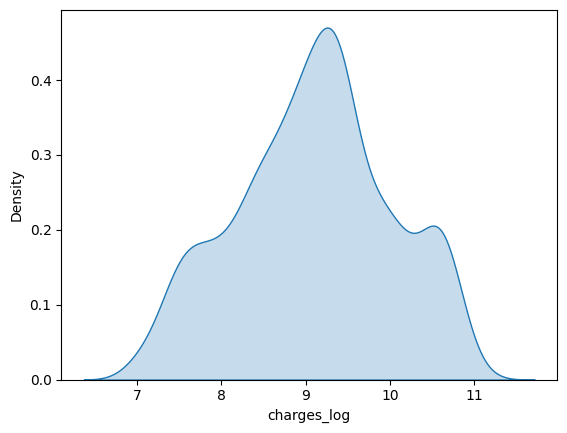

In [ ]:
sns.kdeplot(data=df_ins["charges_log"], fill=True)

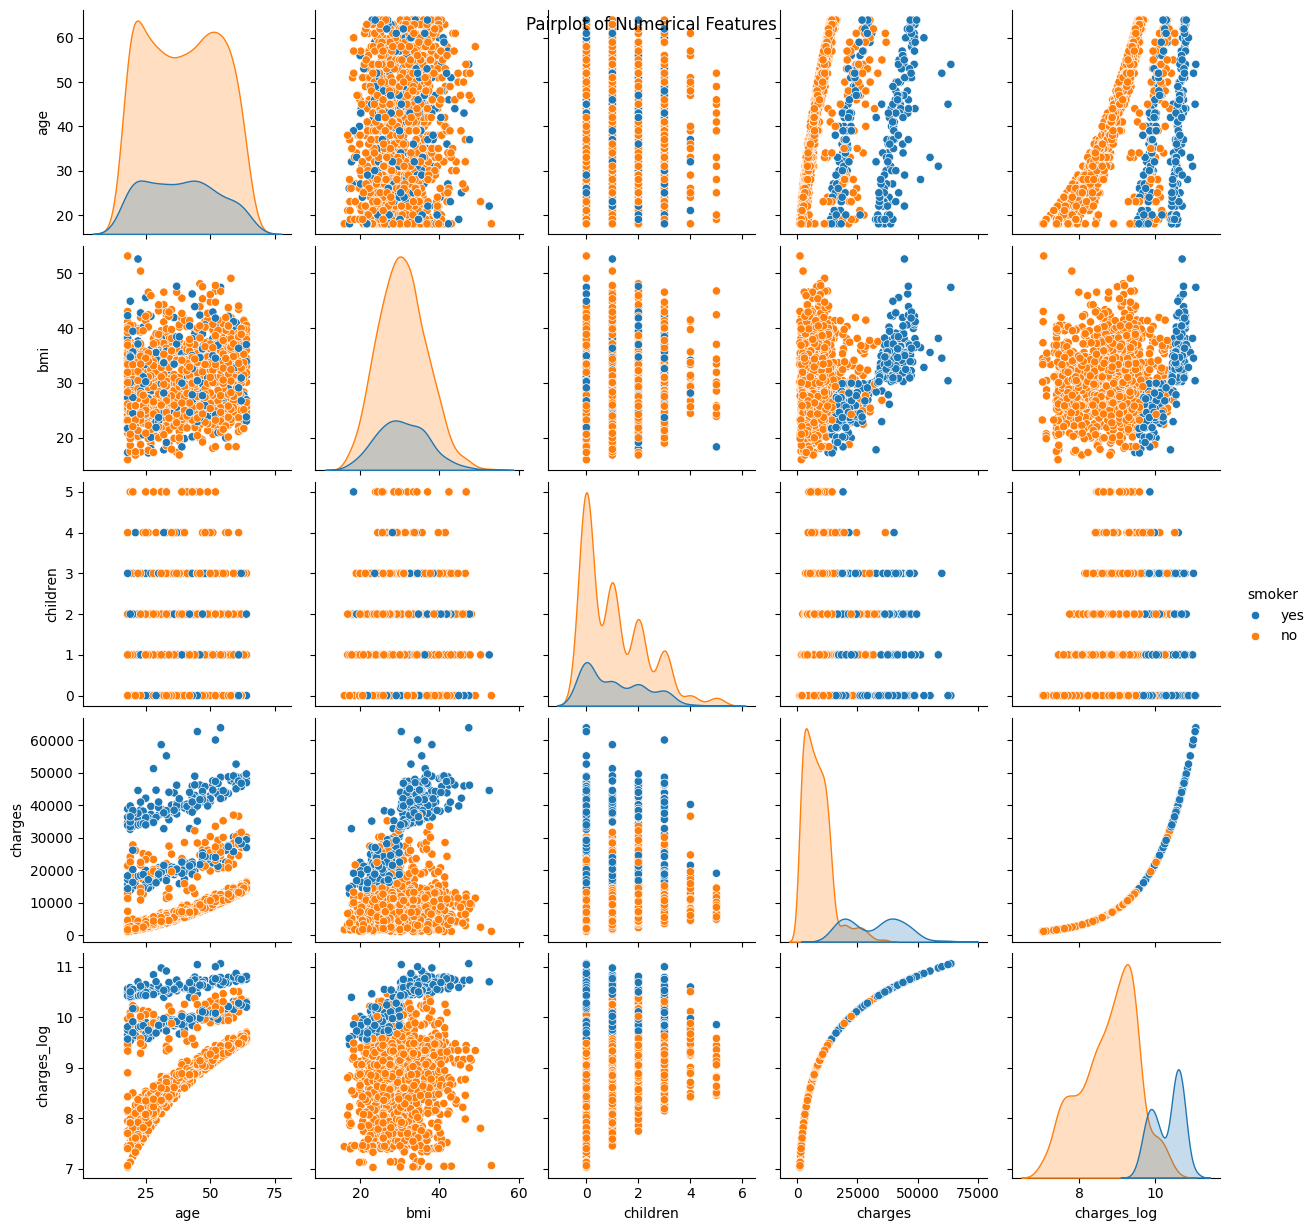

In [ ]:
sns.pairplot(df_ins, hue='smoker')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

In [ ]:
df_ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'charges_log'],
      dtype='object')

In [ ]:
df_ins.shape

(1337, 8)

In [ ]:
# Separate Input and Output Variable
X = df_ins[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Y = df_ins['charges_log']

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

In [ ]:
#Data preparation on train data
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_scaler = StandardScaler()

X_train_num = pd.DataFrame(numerical_scaler.fit_transform(X_train[numerical_cols]),columns=numerical_cols,index = X_train.index)
X_test_num = pd.DataFrame(numerical_scaler.transform(X_test[numerical_cols]),columns=numerical_cols,index = X_test.index)


In [ ]:
X_train_num

,age,bmi,children
763,-0.862948,-0.762336,-0.912228
1079,1.715175,0.506830,1.596607
178,0.497728,-0.284943,0.760329
287,1.715175,-0.730731,-0.912228
1290,-0.075188,-1.773676,0.760329
...,...,...,...
1096,0.855801,0.723070,0.760329
1131,-0.862948,2.542817,0.760329
1295,-1.364249,-1.432681,-0.075949
861,-0.075188,-0.434648,1.596607


In [ ]:
# Instantiate OneHotEncoder
OH_encoder = OneHotEncoder(drop='first', sparse=False)


# Fit and transform on the training data
X_train_OH = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_cols]),
                           columns=OH_encoder.get_feature_names_out(categorical_cols),
                           index=X_train.index)

# Transform on the test data (using the same encoder)
X_test_OH = pd.DataFrame(OH_encoder.transform(X_test[categorical_cols]),
                          columns=OH_encoder.get_feature_names_out(categorical_cols),
                          index=X_test.index)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_OH.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
763,1.0,0.0,0.0,0.0,0.0
1079,1.0,0.0,0.0,1.0,0.0
178,0.0,0.0,0.0,0.0,1.0
287,0.0,0.0,1.0,0.0,0.0
1290,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_OH.shape, X_train.shape

((1002, 5), (1002, 6))

In [ ]:
# Concatenate the transformed features

X_train_concatenated = pd.concat([X_train_num, X_train_OH], axis=1)
X_test_concatenated = pd.concat([X_test_num, X_test_OH], axis=1)


In [ ]:
round(X_train_concatenated.describe(),3)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1002.000,1002.000,1002.000,1002.000,1002.000,1002.000,1002.000,1002.000
mean,-0.000,0.000,-0.000,0.518,0.205,0.252,0.268,0.250
std,1.000,1.000,1.000,0.500,0.404,0.435,0.443,0.434
min,-1.507,-2.437,-0.912,0.000,0.000,0.000,0.000,0.000
25%,-0.863,-0.715,-0.912,0.000,0.000,0.000,0.000,0.000
50%,-0.004,-0.067,-0.076,1.000,0.000,0.000,0.000,0.000
75%,0.856,0.662,0.760,1.000,0.000,1.000,1.000,0.750
max,1.787,3.745,3.269,1.000,1.000,1.000,1.000,1.000


In [ ]:
X_train_concatenated.shape, X_test_concatenated.shape, X_train.shape, X_test.shape

((1002, 8), (335, 8), (1002, 6), (335, 6))

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1002, 6) (1002,)
(335, 6) (335,)


#Model Building

Linear Regression

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
LR_Regression = LinearRegression()
LR_Regression.fit(X_train_concatenated, Y_train)

# Predictions
Y_test_predected_LR = LR_Regression.predict(X_test_concatenated)

# Accuracy
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test,Y_test_predected_LR))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test,Y_test_predected_LR))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test,Y_test_predected_LR)))

Mean Absolute Error:  0.2576503587583096
Mean Squared Error:  0.15837179267409812
Root Mean Squared Error:  0.3979595364783939


K-NN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN_Regression = KNeighborsRegressor()
KNN_Regression.fit(X_train_concatenated, Y_train)

# Predictions
Y_test_predected_KNN = KNN_Regression.predict(X_test_concatenated)

# Accuracy
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test,Y_test_predected_KNN))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test,Y_test_predected_KNN))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test,Y_test_predected_KNN)))

Mean Absolute Error:  0.31414360722791046
Mean Squared Error:  0.2325497005800287
Root Mean Squared Error:  0.4822340723964128


Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT_Regression = DecisionTreeRegressor()
DT_Regression.fit(X_train_concatenated, Y_train)

# Predictions
Y_test_predected_DT = DT_Regression.predict(X_test_concatenated)

# Accuracy
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test,Y_test_predected_DT))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test,Y_test_predected_DT))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test,Y_test_predected_DT)))

Mean Absolute Error:  0.226700557150356
Mean Squared Error:  0.27244671596800435
Root Mean Squared Error:  0.5219642861039483


Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_Regression = RandomForestRegressor()
RF_Regression.fit(X_train_concatenated, Y_train)

# Predictions
Y_test_predected_RF = RF_Regression.predict(X_test_concatenated)

# Accuracy
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test,Y_test_predected_RF))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test,Y_test_predected_RF))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test,Y_test_predected_RF)))

Mean Absolute Error:  0.203346335770971
Mean Squared Error:  0.14854205681324248
Root Mean Squared Error:  0.38541154213806633


SVM Regression

In [ ]:
from sklearn.svm import SVR

# Modelling SVM Regression
svm_model = SVR()
svm_model.fit(X_train_concatenated, Y_train)

# Predictions
Y_test_predected_svm = svm_model.predict(X_test_concatenated)

# Accuracy
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test,Y_test_predected_svm))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test,Y_test_predected_svm))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test,Y_test_predected_svm)))

Mean Absolute Error:  0.1661240356571017
Mean Squared Error:  0.1126833568072182
Root Mean Squared Error:  0.33568341753386954


In [ ]:
Evaluation = pd.DataFrame({"Algorithms":["Logistic Regression","KNN","Decision Tree","Random Forest","SVM"], "MAE":[metrics.mean_absolute_error(Y_test,Y_test_predected_LR), metrics.mean_absolute_error(Y_test,Y_test_predected_KNN), metrics.mean_absolute_error(Y_test,Y_test_predected_DT), metrics.mean_absolute_error(Y_test,Y_test_predected_RF), metrics.mean_absolute_error(Y_test,Y_test_predected_svm)]})
Evaluation

,Algorithms,MAE
0,Logistic Regression,0.257650
1,KNN,0.314144
2,Decision Tree,0.226701
3,Random Forest,0.203346
4,SVM,0.166124


#Conclusion on the best algorithm

**Best Algorithm:** SVM with MAE 0.166

The Support Vector Machine (SVM) algorithm stands out as the best-performing model for predicting medical costs, with a low Mean Absolute Error (MAE) of 0.166.